**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

- Importing data into dataframe from csv

In [2]:
df=pd.read_csv(r"E:\heart_disease_prediction\Patient_Health_Data.csv")

- Reading few rows of the dataset

In [3]:
df.head()

,Patient_ID,Height_cm,Weight_kg,Blood_Pressure,Temperature_C,Heart_Rate,Symptoms,Existing_Conditions,Disease_Predictions,Laboratory_Test_Results,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Family_History_Heart_Disease,Smoking_Status
0,P0001,174.0,59.0,120/80,36.6,63.0,chest pain,Diabetes,Heart Disease,High Cholesterol,198.0,79.0,Yes,Never
1,P0002,NaN,67.0,130/85,37.0,68.0,shortness of breath,Hypertension,Coronary Artery Disease,NaN,179.0,90.0,No,Former
2,P0003,176.0,58.0,140/90,37.0,65.0,fatigue,High Cholesterol,Arrhythmia,Normal,193.0,82.0,NaN,Current
3,P0004,185.0,65.0,125/82,37.2,69.0,dizziness,NaN,NaN,NaN,228.0,103.0,No,Never
4,P0005,167.0,41.0,135/88,36.3,72.0,palpitations,Asthma,Hypertension,NaN,251.0,135.0,Yes,Former


- Finding columns name

In [4]:
df.columns

Index(['Patient_ID', 'Height_cm', 'Weight_kg', 'Blood_Pressure',
       'Temperature_C', 'Heart_Rate', 'Symptoms', 'Existing_Conditions',
       'Disease_Predictions', 'Laboratory_Test_Results', 'Cholesterol_mg_dL',
       'Blood_Sugar_mg_dL', 'Family_History_Heart_Disease', 'Smoking_Status'],
      dtype='object')

- Finding number of ROWS and COLUMNS

In [5]:
df.shape

(2000, 14)

- Basic info of data

In [6]:
df[['Blood_Pressure']].dtypes

Blood_Pressure    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     1915 non-null   float64
 2   Weight_kg                     1914 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 1892 non-null   float64
 5   Heart_Rate                    1903 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             1899 non-null   float64
 11  Blood_Sugar_mg_dL             1880 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_cm,1915.0,169.902350,9.842987,137.0,163.0,170.0,176.0,208.0
Weight_kg,1914.0,69.388715,15.047664,24.0,59.0,70.0,79.0,128.0
Temperature_C,1892.0,36.970983,0.497384,35.4,36.7,37.0,37.3,38.6
Heart_Rate,1903.0,74.567525,10.325641,38.0,67.0,74.0,82.0,110.0
Cholesterol_mg_dL,1899.0,199.612954,39.454690,43.0,174.0,200.0,226.0,335.0
Blood_Sugar_mg_dL,1880.0,99.007447,29.952720,-1.0,79.0,99.0,119.0,201.0


Spliting columns based on data type

In [9]:
num_columns = df.select_dtypes(include=[np.number]).columns
cat_columns = df.select_dtypes(exclude=[np.number]).columns

In [10]:
print("Numerical columns \n",num_columns)
print("Categorical columns \n",cat_columns)

Numerical columns 
 Index(['Height_cm', 'Weight_kg', 'Temperature_C', 'Heart_Rate',
       'Cholesterol_mg_dL', 'Blood_Sugar_mg_dL'],
      dtype='object')
Categorical columns 
 Index(['Patient_ID', 'Blood_Pressure', 'Symptoms', 'Existing_Conditions',
       'Disease_Predictions', 'Laboratory_Test_Results',
       'Family_History_Heart_Disease', 'Smoking_Status'],
      dtype='object')


**Cleaning Numerical Columns**

In [11]:
df["Height_cm"].isnull().sum()  

np.int64(85)

In [12]:
df.isnull().sum().sum()

np.int64(3112)

Distribution of the Height cm

<Axes: ylabel='Frequency'>

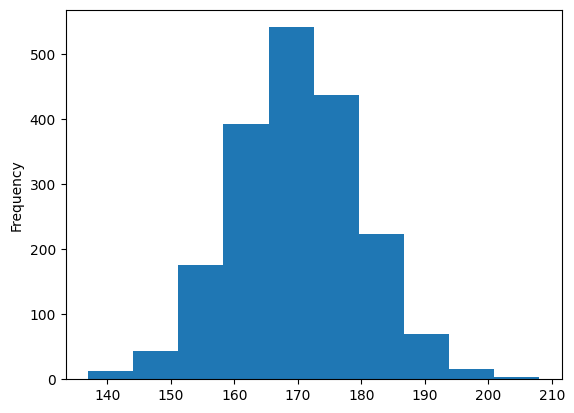

In [13]:
import matplotlib.pyplot as plt
df["Height_cm"].plot(kind='hist',bins=10)

In [14]:
df["Height_cm"].fillna(df["Height_cm"].mean(),inplace=True)

In [15]:
print(df["Height_cm"].isnull().sum())

0


In [16]:
df["Weight_kg"].isnull().sum()

np.int64(86)

<Axes: ylabel='Frequency'>

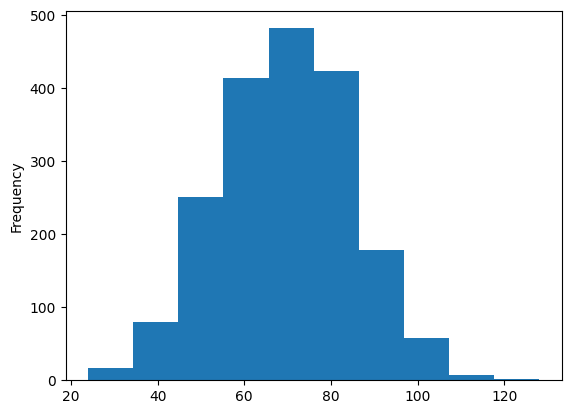

In [17]:
df["Weight_kg"].plot(kind='hist',bins=10)

The distibution of Weight is in Normal Distribution

In [18]:
df["Weight_kg"].fillna(df["Weight_kg"].mean(),inplace=True)

In [19]:
print(df["Weight_kg"].isnull().sum())

0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 1892 non-null   float64
 5   Heart_Rate                    1903 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             1899 non-null   float64
 11  Blood_Sugar_mg_dL             1880 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [21]:
df["Temperature_C"].isnull().sum()

np.int64(108)

<Axes: ylabel='Frequency'>

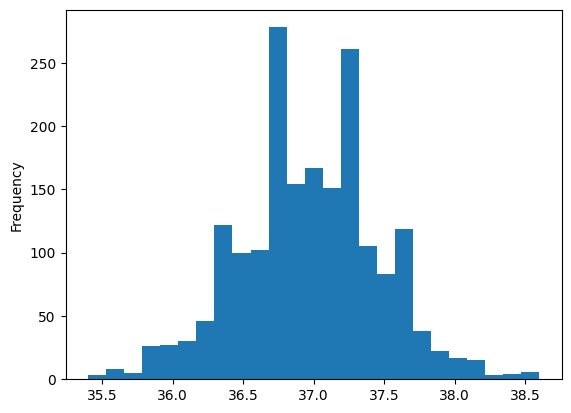

In [22]:
df["Temperature_C"].plot(kind='hist',bins=25)

Temperature_C column has its distribution in normal distribution

In [23]:
df_temp =df["Temperature_C"].fillna(df["Temperature_C"].mean(),inplace=True)

In [24]:
print(df["Temperature_C"].isnull().sum())

0


In [25]:
df["Heart_Rate"].isnull().sum()

np.int64(97)

<Axes: ylabel='Frequency'>

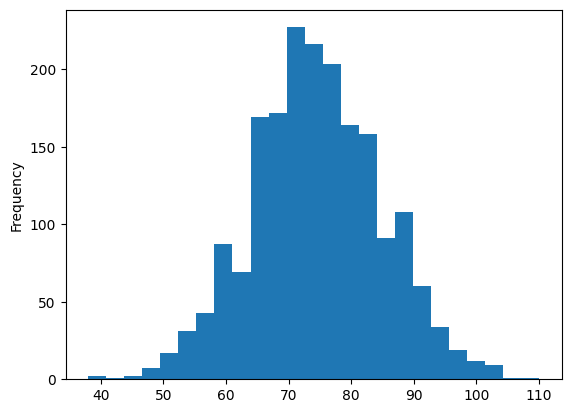

In [26]:
df["Heart_Rate"].plot(kind='hist',bins=25)

Heart_Rate has distribution like Normal Distribution

In [27]:
df_heart_rate =df["Heart_Rate"].fillna(df["Heart_Rate"].mean(),inplace=True)

In [28]:
df["Heart_Rate"].isnull().sum()

np.int64(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             1899 non-null   float64
 11  Blood_Sugar_mg_dL             1880 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [30]:
df["Disease_Predictions"].isnull().sum()

np.int64(512)

In [31]:
df["Existing_Conditions"].unique()

array(['Diabetes', 'Hypertension', 'High Cholesterol', nan, 'Asthma',
       'Thyroid'], dtype=object)

In [32]:
df["Disease_Predictions"].unique()

array(['Heart Disease', 'Coronary Artery Disease', 'Arrhythmia', nan,
       'Hypertension', 'Stroke'], dtype=object)

In [33]:
df.groupby('Existing_Conditions')["Disease_Predictions"].value_counts()

Existing_Conditions  Disease_Predictions    
Asthma               Hypertension               266
Diabetes             Heart Disease              269
High Cholesterol     Arrhythmia                 267
Hypertension         Coronary Artery Disease    261
Name: count, dtype: int64

In [34]:
df.loc[(df["Existing_Conditions"]=="Diabetes") & (df["Disease_Predictions"].isna()),"Disease_Predictions"]=="Heart Disease"

108     False
120     False
150     False
312     False
450     False
486     False
504     False
558     False
570     False
828     False
834     False
858     False
894     False
1170    False
1236    False
1284    False
1350    False
1422    False
1512    False
1566    False
1572    False
1578    False
1728    False
1758    False
1776    False
1812    False
1830    False
1896    False
1914    False
1992    False
Name: Disease_Predictions, dtype: bool

In [35]:
df.loc[(df['Existing_Conditions'] == 'Diabetes') & (df['Disease_Predictions'].isna()), 'Disease_Predictions'] = 'Heart Disease'
